In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Types of missing value

1.since there are some relationship btw age and cabin , its not missing completely at random

In [6]:
data[data['Embarked'].isnull()] #mcar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. missing data not at random---there is some relationship

 to find the percentage of missing values

In [11]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [12]:
data['Cabin_null'].mean()

0.7710437710437711

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
 data.groupby(data['Survived'])['Cabin_null'].mean() #mean of survived and not survived

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. missing at random

 ## handling missing values

1. replace with mean/ median/ mode. used in MCAR condition

In [33]:
 df = data[['Age','Fare','Survived']]

In [34]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [35]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [36]:
def handle_null(data,column,median):
    data[column+"_imputed"] = df[column].fillna(median)
    #fillna is used to fill the missing value

In [37]:
median = df['Age'].median()

In [38]:
handle_null(df,'Age',median)

C:\Users\amals\AppData\Local\Temp\ipykernel_20792\2192193895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+"_imputed"] = df[column].fillna(median)


In [39]:
df.head()

,Age,Fare,Survived,Age_imputed
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [40]:
df.isnull().sum()

Age            177
Fare             0
Survived         0
Age_imputed      0
dtype: int64

so here you can see that Age_imputed column has no null values. i just created a new column for imputed age column. the nan values in the age column has been replaced with median

i have used median here because, there might be outliers and it might affect when we compute the mean

In [31]:
print(df['Age_imputed'].std())

13.019696550973194


In [41]:
print(df['Age'].std())

14.526497332334044


we can see a small change in standard deviation , and that doesnt make a problem

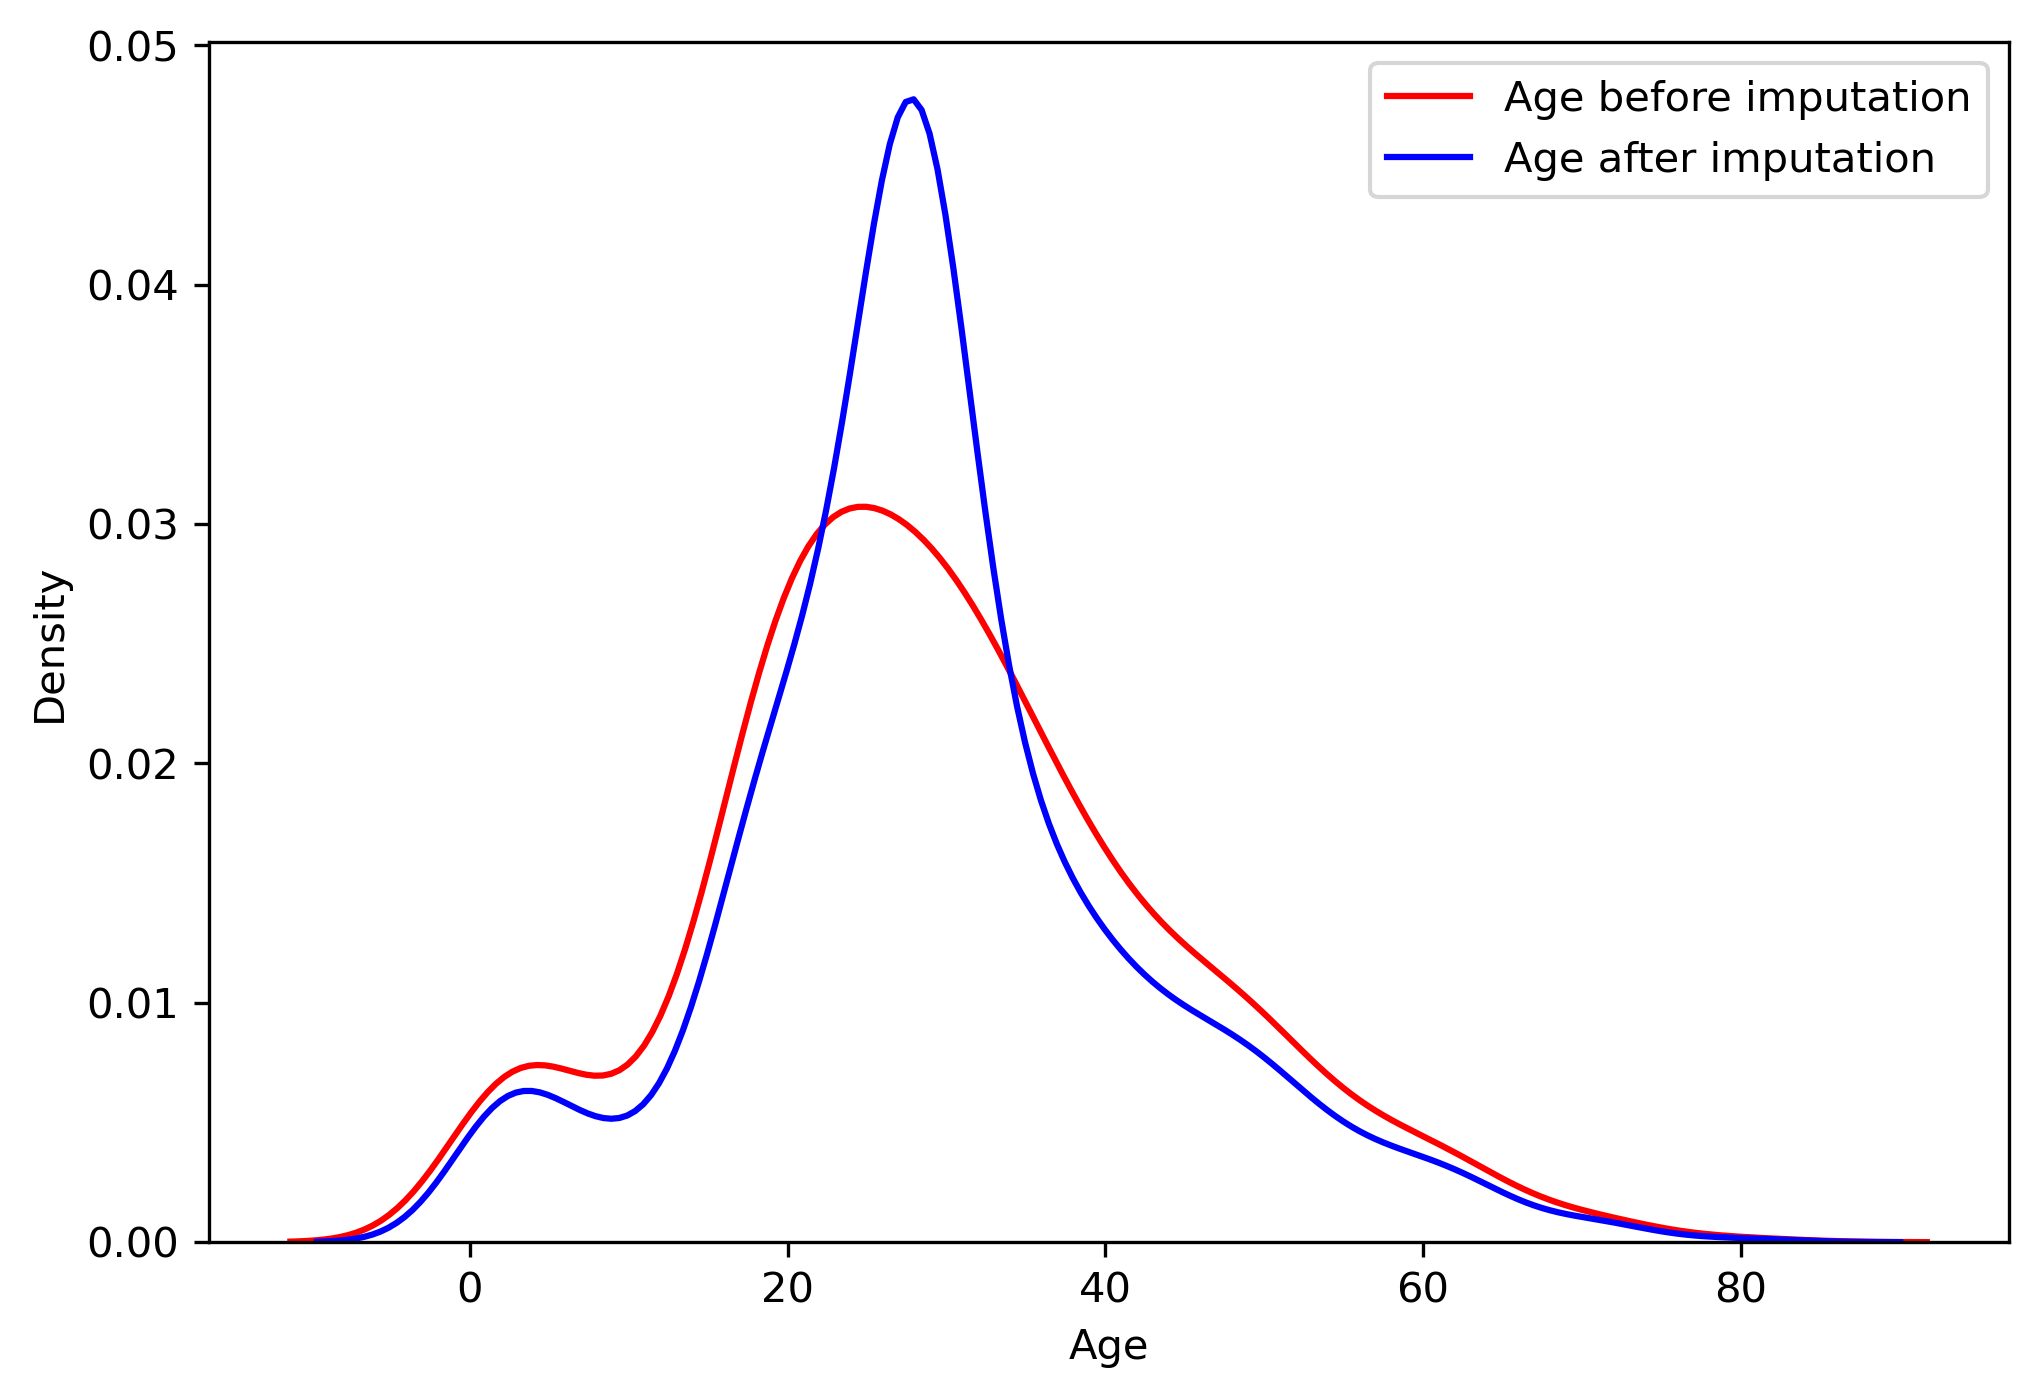

In [59]:
fig = plt.figure(dpi = 300)
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(df['Age'],color = "red",label = 'Age before imputation')
sns.kdeplot(df['Age_imputed'],color = 'Blue',label = 'Age after imputation')
plt.legend()

Advantages:
    1. Straight forward
    2. Easy and faster way to handle null values
    
Disadvantages:
    1. As we have seen in the above plot, there is a slight variance
    2. Correlation will change

In [60]:
df.corr()

,Age,Fare,Survived,Age_imputed
Age,1.000000,0.096067,-0.077221,1.000000
Fare,0.096067,1.000000,0.257307,0.096688
Survived,-0.077221,0.257307,1.000000,-0.064910
Age_imputed,1.000000,0.096688,-0.064910,1.000000


In [65]:
import os
os. getcwd()

'C:\\Users\\amals\\Untitled Folder 2'